In [ ]:
# 1번

Text(0, 0.5, '$p_x(k)$')

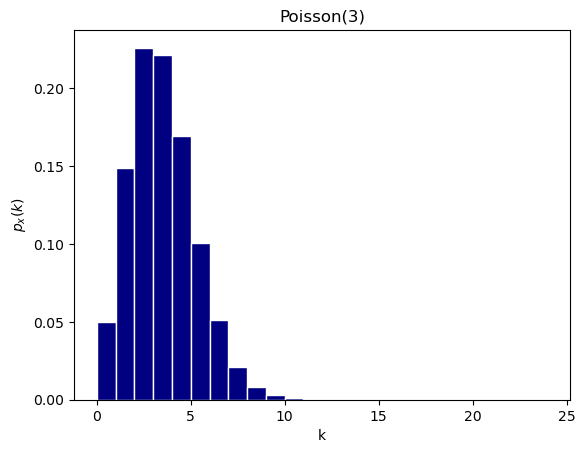

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rand_pois=np.random.poisson(lam=3, size=100000)
plt.hist(rand_pois, bins=range(0, 25), density=True, color='navy', edgecolor='white')
plt.title('Poisson(3)')
plt.xlabel('k')
plt.ylabel('$p_x(k)$')

Text(0, 0.5, '$p_x(k)$')

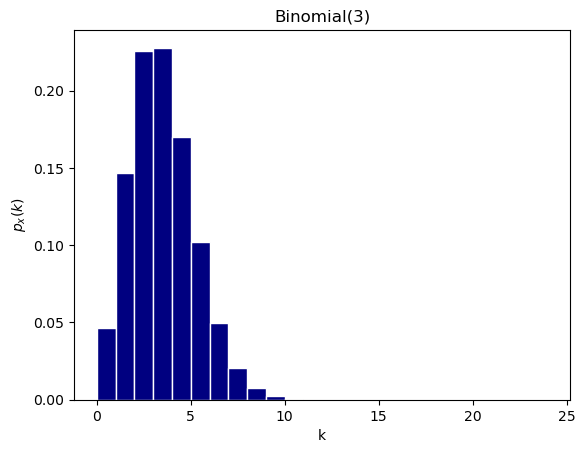

In [7]:
rand_bino=np.random.binomial(100, 0.03, size=100000)
plt.hist(rand_bino, bins=range(0, 25), density=True, color='navy', edgecolor='white')
plt.title('Binomial(3)')
plt.xlabel('k')
plt.ylabel('$p_x(k)$')

In [ ]:
# 2번

In [9]:
import time

def mean_numpy(data):
    start=time.time()
    ret=np.mean(data)
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)
    
def median_numpy(data):
    start=time.time()
    ret=np.median(data)   
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

def variance_numpy(data):
    start=time.time()
    ret=np.var(data)
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

def mad_numpy(data):
    start=time.time()
    ret=np.median(np.absolute(data-np.median(data)))
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

def skewness_numpy(data):
    start=time.time()
    mean=np.mean(data)
    std=np.std(data)
    length=len(data)    
    ret=np.sum(((data-mean)/std)**3)/length
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

def kurtosis_numpy(data):
    start=time.time()
    mean=np.mean(data)
    std=np.std(data)
    length=len(data)
    ret=(np.sum(((data-mean)/std)**4)/length)-3
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

def iqr_numpy(data):
    start=time.time()
    ret=np.percentile(data,75)-np.percentile(data,25)
    end=time.time()
    time1.append(round(end-start,5))
    method1.append(ret)

#============================================================

def sum(data):
    sum=0
    for e in data: sum+=e
    return sum

def length(data):
    leng=0
    for e in data: leng+=1
    return leng

def sort(data):
    max_val = max(data)
    min_val = min(data)
    range_of_elements = max_val - min_val + 1
    count = [0] * range_of_elements
    output = [0] * length(data)
    for num in data:
        count[num - min_val] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    for i in range(len(data)-1, -1, -1):
        output[count[data[i] - min_val] - 1] = data[i]
        count[data[i] - min_val] -= 1
    for i in range(len(data)):
        data[i] = output[i]
    return data

def percentile(data, percentile):    
    sorted_data=sort(data)
    n=length(sorted_data)
    k=(percentile/100)*(n-1)
    lower_index=int(k)
    upper_index=lower_index+1
    fraction=k-lower_index
    if(upper_index>=n):
        return sorted_data[lower_index]
    else:
        return sorted_data[lower_index]*(1-fraction)+sorted_data[upper_index]*fraction

def mean_return(data):    
    return sum(data)/length(data)

def median_return(data):    
    leng=length(data)
    data=sort(data)    
    if(leng%2==0): 
        return (data[leng//2]+data[leng//2+1])/2
    return data[leng//2]       

def variance_return(data):    
    leng=length(data)
    mean=mean_return(data)
    sum=0
    for e in data:        
        sum+=(e-mean)**2
    return sum/leng

def mean_normal(data):
    start=time.time()
    ret=sum(data)/length(data)
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)    

def median_normal(data):
    start=time.time()
    leng=length(data)
    data=sort(data)
    ret=0
    if(leng%2==0): ret=(data[leng//2]+data[leng//2+1])/2
    else: ret=data[leng//2]   
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

def variance_normal(data):
    start=time.time()
    leng=length(data)
    mean=mean_return(data)
    sum=0
    for e in data:        
        sum+=(e-mean)**2
    ret=sum/leng
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

def mad_normal(data):
    start=time.time()
    median=median_return(data)
    leng=length(data)
    new_data=[]
    for e in data:
        new_data.append(e-median)
    for i in range(leng):
        if(new_data[i]<0): new_data[i]*=-1
        new_data[i]=int(new_data[i])
    ret=median_return(new_data)
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

def skewness_normal(data):
    start=time.time()
    mean=mean_return(data)
    std=variance_return(data)**0.5    
    leng=length(data)
    sum=0
    for e in data:
        sum+=((e-mean)/std)**3
    ret=sum/leng
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

def kurtosis_normal(data):
    start=time.time()
    mean=mean_return(data)
    std=variance_return(data)**0.5    
    leng=length(data)
    sum=0
    for e in data:
        sum+=((e-mean)/std)**4
    ret=sum/leng-3
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

def iqr_normal(data):
    start=time.time()
    ret=percentile(data,75)-percentile(data,25)
    end=time.time()
    time2.append(round(end-start,5))
    method2.append(ret)

In [11]:
statistic=['Mean','Median','Variance','MAD','Skewness','Kurtosis','IQR']
method1=[]
method2=[]
time1=[]
time2=[]

mean_numpy(rand_pois)
median_numpy(rand_pois)
variance_numpy(rand_pois)
mad_numpy(rand_pois)
skewness_numpy(rand_pois)
kurtosis_numpy(rand_pois)
iqr_numpy(rand_pois)
mean_normal(rand_pois)
median_normal(rand_pois)
variance_normal(rand_pois)
mad_normal(rand_pois)
skewness_normal(rand_pois)
kurtosis_normal(rand_pois)
iqr_normal(rand_pois)

In [12]:
import pandas as pd
sample1=pd.DataFrame()
sample1['statistic']=statistic
sample1['method1']=method1
sample1['method2']=method1
sample1['time1']=time1
sample1['time2']=time2
sample1

,statistic,method1,method2,time1,time2
0,Mean,3.000910,3.000910,0.00103,0.08012
1,Median,3.000000,3.000000,0.00101,0.35095
2,Variance,3.002189,3.002189,0.00000,0.18116
3,MAD,1.000000,1.000000,0.01045,0.67099
4,Skewness,0.582700,0.582700,0.01157,0.48570
5,Kurtosis,0.371906,0.371906,0.01867,0.37928
6,IQR,2.000000,2.000000,0.00594,0.58504


time1: 내부 함수 or vectorize를 사용하여 통계량을 계산하는데 걸린 시간
time2: 내부 함수 or vectorize를 사용하지 않고 통계량을 계산하는데 걸린 시간


<Axes: xlabel='statistic', ylabel='time'>

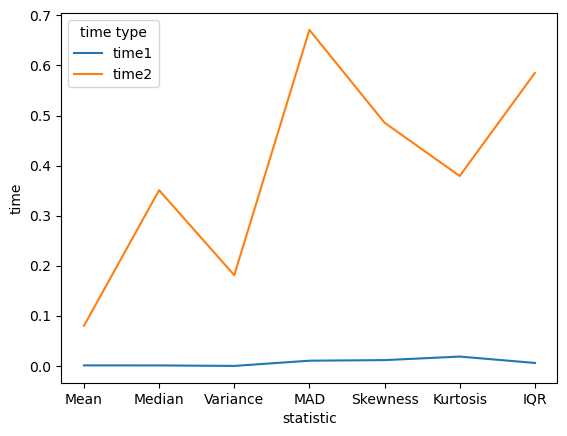

In [13]:
import seaborn as sns

print('time1: 내부 함수 or vectorize를 사용하여 통계량을 계산하는데 걸린 시간')
print('time2: 내부 함수 or vectorize를 사용하지 않고 통계량을 계산하는데 걸린 시간')

df=sample1.melt(id_vars='statistic',value_vars=['time1','time2'],var_name='time type',value_name='time')

sns.lineplot(data=df, x='statistic', y='time', hue='time type')

In [14]:
statistic=['Mean','Median','Variance','MAD','Skewness','Kurtosis','IQR']
method1=[]
method2=[]
time1=[]
time2=[]

mean_numpy(rand_bino)
median_numpy(rand_bino)
variance_numpy(rand_bino)
mad_numpy(rand_bino)
skewness_numpy(rand_bino)
kurtosis_numpy(rand_bino)
iqr_numpy(rand_bino)
mean_normal(rand_bino)
median_normal(rand_bino)
variance_normal(rand_bino)
mad_normal(rand_bino)
skewness_normal(rand_bino)
kurtosis_normal(rand_bino)
iqr_normal(rand_bino)

In [15]:
import pandas as pd
sample2=pd.DataFrame()
sample2['statistic']=statistic
sample2['method1']=method1
sample2['method2']=method1
sample2['time1']=time1
sample2['time2']=time2
sample2

,statistic,method1,method2,time1,time2
0,Mean,3.008160,3.008160,0.00000,0.05466
1,Median,3.000000,3.000000,0.00000,0.31332
2,Variance,2.911273,2.911273,0.00620,0.16558
3,MAD,1.000000,1.000000,0.00000,0.69389
4,Skewness,0.557105,0.557105,0.01865,0.33123
5,Kurtosis,0.285249,0.285249,0.00626,0.27889
6,IQR,2.000000,2.000000,0.01068,0.63535


time1: 내부 함수 or vectorize를 사용하여 통계량을 계산하는데 걸린 시간
time2: 내부 함수 or vectorize를 사용하지 않고 통계량을 계산하는데 걸린 시간


<Axes: xlabel='statistic', ylabel='time'>

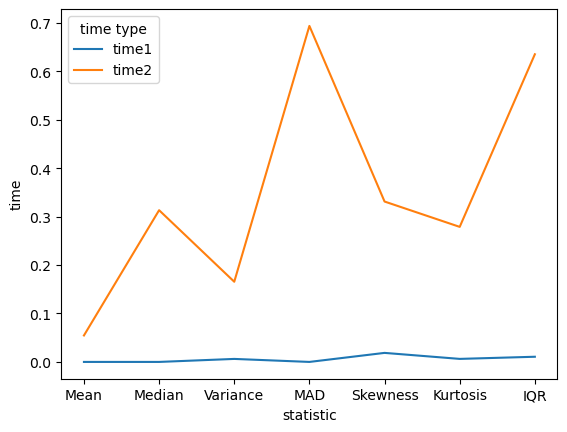

In [18]:
print('time1: 내부 함수 or vectorize를 사용하여 통계량을 계산하는데 걸린 시간')
print('time2: 내부 함수 or vectorize를 사용하지 않고 통계량을 계산하는데 걸린 시간')

df=sample2.melt(id_vars='statistic',value_vars=['time1','time2'],var_name='time type',value_name='time')

sns.lineplot(data=df, x='statistic', y='time', hue='time type')

In [ ]:
# 3번

In [23]:
import pandas as pd

data = pd.read_csv("covid19_utf8.csv", parse_dates=['자치구 기준일'])
data['자치구 기준일'] = pd.to_datetime(data['자치구 기준일'], format='%Y.%m.%d.%H', errors='coerce')
data.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022-09-18,63754,68,57576,70,99069,104,137062,142,166691,...,189287,241,243626,271,310841,341,216999,292,292894,274
1,2022-09-17,63686,107,57506,86,98965,151,136920,204,166471,...,189046,245,243355,296,310500,485,216707,340,292620,498
2,2022-09-16,63579,146,57420,105,98814,172,136717,257,166196,...,188801,329,243059,397,310015,605,216367,449,292125,588
3,2022-09-15,63433,163,57315,111,98642,228,136460,273,165849,...,188472,418,242662,521,309410,690,215918,496,291533,823
4,2022-09-14,63270,229,57204,173,98414,343,136187,450,165410,...,188054,560,242143,692,308720,980,215422,877,290710,912


In [25]:
data_220608 = data.iloc[18:110][::-1]
data_220608

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
109,2022-06-01,48506,37,44042,28,73962,62,106338,84,127469,...,141686,130,183627,311,234701,146,165214,105,221857,186
108,2022-06-02,48530,24,44056,14,73995,33,106441,103,127519,...,141775,89,183844,217,234821,120,165296,82,221962,105
107,2022-06-03,48560,30,44077,21,74065,71,106629,188,127573,...,141891,116,183964,120,234960,139,165378,83,222103,141
106,2022-06-04,48592,32,44096,19,74172,107,106738,109,127648,...,142011,120,184107,143,235066,106,165454,76,222269,166
105,2022-06-05,48618,26,44127,31,74212,40,106797,59,127695,...,142083,72,184218,111,235194,128,165521,67,222359,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2022-08-27,60604,183,54915,172,94288,314,130683,419,158105,...,179710,603,231603,741,294850,1009,205306,661,278070,955
21,2022-08-28,60746,142,55058,143,94541,253,131023,340,158591,...,180247,537,232243,640,295658,808,205914,608,278712,642
20,2022-08-29,60805,59,55116,58,94651,110,131163,140,158803,...,180527,280,232569,326,295994,336,206243,329,279081,369
19,2022-08-30,61082,280,55347,231,95075,425,131684,522,159451,...,181253,726,233682,1114,297397,1404,207162,921,280255,1156


In [27]:
data_barplot_220608 = pd.Series(data_220608.iloc[-1].values - data_220608.iloc[0].values, index=data_220608.columns)
data_barplot_220608 = data_barplot_220608.loc[["종로구 전체", "용산구 전체", "관악구 전체", "강남구 전체", "성동구 전체", "강북구 전체", "송파구 전체"]]
ind = data_barplot_220608.index.values
val = data_barplot_220608.values
data_barplot_220608 = pd.DataFrame({'지역구':ind, '확진자':val})
data_barplot_220608

,지역구,확진자
0,종로구 전체,12669
1,용산구 전체,21406
2,관악구 전체,48189
3,강남구 전체,50807
4,성동구 전체,25750
5,강북구 전체,23602
6,송파구 전체,63679


<Axes: xlabel='지역구', ylabel='확진자'>

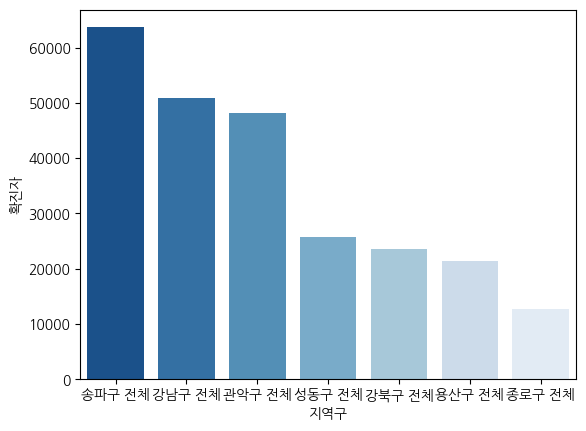

In [113]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'

order=data_barplot_220608.sort_values("확진자",ascending=False)["지역구"]
sns.barplot(x="지역구", y="확진자", data=data_barplot_220608, order=order, 
            hue="지역구", hue_order=order, palette="Blues_r")

In [51]:
data_220608['월']=pd.DatetimeIndex(data_220608['자치구 기준일']).month
data_220608

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가,월
109,2022-06-01,48506,37,44042,28,73962,62,106338,84,127469,...,130,183627,311,234701,146,165214,105,221857,186,6
108,2022-06-02,48530,24,44056,14,73995,33,106441,103,127519,...,89,183844,217,234821,120,165296,82,221962,105,6
107,2022-06-03,48560,30,44077,21,74065,71,106629,188,127573,...,116,183964,120,234960,139,165378,83,222103,141,6
106,2022-06-04,48592,32,44096,19,74172,107,106738,109,127648,...,120,184107,143,235066,106,165454,76,222269,166,6
105,2022-06-05,48618,26,44127,31,74212,40,106797,59,127695,...,72,184218,111,235194,128,165521,67,222359,90,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2022-08-27,60604,183,54915,172,94288,314,130683,419,158105,...,603,231603,741,294850,1009,205306,661,278070,955,8
21,2022-08-28,60746,142,55058,143,94541,253,131023,340,158591,...,537,232243,640,295658,808,205914,608,278712,642,8
20,2022-08-29,60805,59,55116,58,94651,110,131163,140,158803,...,280,232569,326,295994,336,206243,329,279081,369,8
19,2022-08-30,61082,280,55347,231,95075,425,131684,522,159451,...,726,233682,1114,297397,1404,207162,921,280255,1156,8


In [67]:
boxdata_220608=data_220608[['종로구 추가','강남구 추가','관악구 추가','용산구 추가','월']]
boxdata_220608

,종로구 추가,강남구 추가,관악구 추가,용산구 추가,월
109,37,311,140,62,6
108,24,217,77,33,6
107,30,120,112,71,6
106,32,143,73,107,6
105,26,111,102,40,6
...,...,...,...,...,...
22,183,741,723,314,8
21,142,640,681,253,8
20,59,326,284,110,8
19,280,1114,969,425,8


In [69]:
boxdata_220608=boxdata_220608.melt(id_vars='월',value_vars=['종로구 추가','강남구 추가','관악구 추가','용산구 추가'],
                                   var_name='지역구',value_name='확진자')
boxdata_220608['지역구']=boxdata_220608['지역구'].str.replace(' 추가', '')
boxdata_220608

,월,지역구,확진자
0,6,종로구,37
1,6,종로구,24
2,6,종로구,30
3,6,종로구,32
4,6,종로구,26
...,...,...,...
363,8,용산구,314
364,8,용산구,253
365,8,용산구,110
366,8,용산구,425


<Axes: xlabel='지역구', ylabel='확진자'>

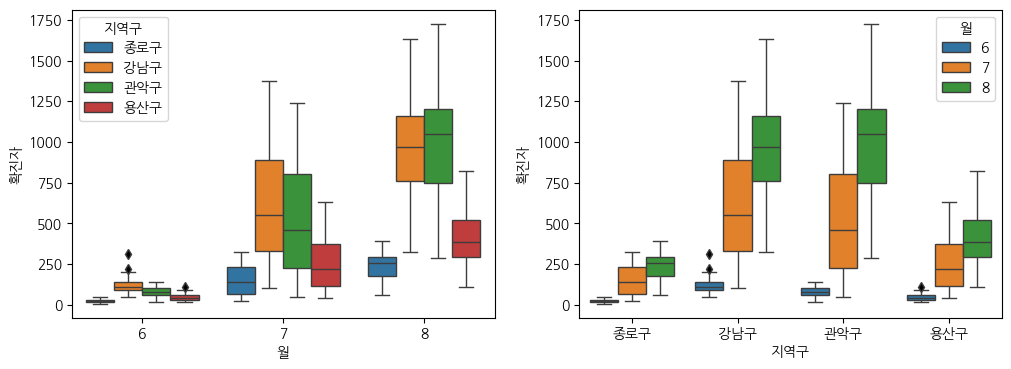

In [129]:
fig,ax=plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=boxdata_220608,x='월',y='확진자',hue='지역구',palette=sns.color_palette(n_colors=4),
            flierprops={"marker": "d", 'markerfacecolor':'black', 'markersize':'5'},ax=ax[0])
sns.boxplot(data=boxdata_220608,x='지역구',y='확진자',hue='월',palette=sns.color_palette(n_colors=3),
            flierprops={"marker": "d", 'markerfacecolor':'black', 'markersize':'5'},ax=ax[1])

In [ ]:
# 4번

In [131]:
df1 = pd.read_csv('NBA_season1718_salary.csv')
df1.rename(columns={'Player':'name', 'Tm': 'Team', 'season17_18': 'Salary'}, inplace=True)
df1 = df1[['name','Team','Salary']]
df1.head()

,name,Team,Salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


<Axes: ylabel='Team'>

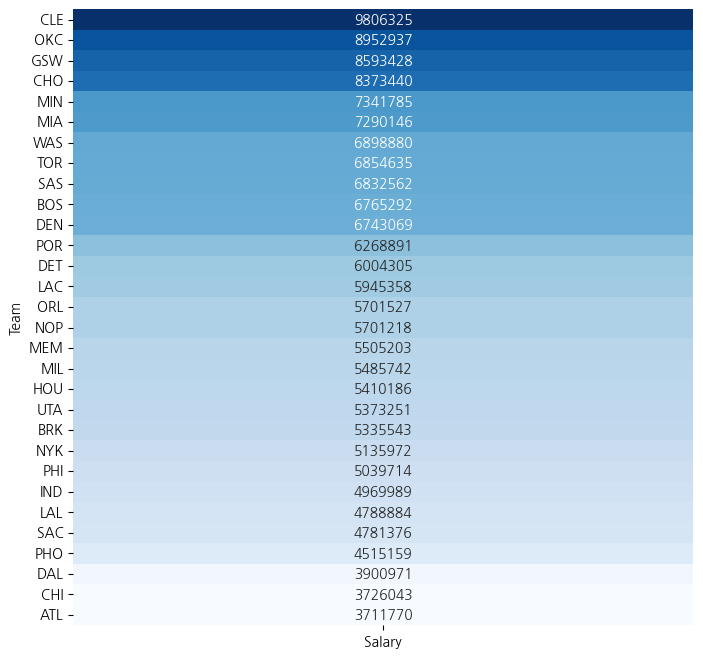

In [139]:
plt.figure(figsize=(8,8))
pivot_table = df1.pivot_table(values='Salary', index='Team', aggfunc='mean')
pivot_table.sort_values(by=['Salary'], ascending=False, inplace=True)
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues', cbar=False)

In [141]:
df2 = pd.read_csv('player_data.csv')
df2 = df2[['name','position']]
data = pd.merge(df1, df2, on='name', how='inner')
data.rename(columns={'position':'Position'}, inplace=True)
data.head()

,name,Team,Salary,Position
0,Stephen Curry,GSW,34682550.0,G
1,LeBron James,CLE,33285709.0,F-G
2,Paul Millsap,DEN,31269231.0,F
3,Gordon Hayward,BOS,29727900.0,F-G
4,Blake Griffin,DET,29512900.0,F


<Axes: xlabel='Position', ylabel='Salary'>

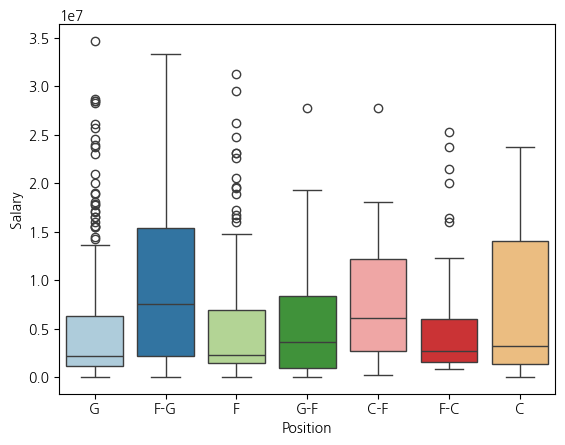

In [143]:
sns.boxplot(x='Position', y='Salary', data=data, hue='Position', palette="Paired")

In [144]:
data['Position'] = data['Position'].str.split('-')
data = data.explode('Position').reset_index(drop=True)
data.head()

,name,Team,Salary,Position
0,Stephen Curry,GSW,34682550.0,G
1,LeBron James,CLE,33285709.0,F
2,LeBron James,CLE,33285709.0,G
3,Paul Millsap,DEN,31269231.0,F
4,Gordon Hayward,BOS,29727900.0,F


<Axes: xlabel='Position', ylabel='Salary'>

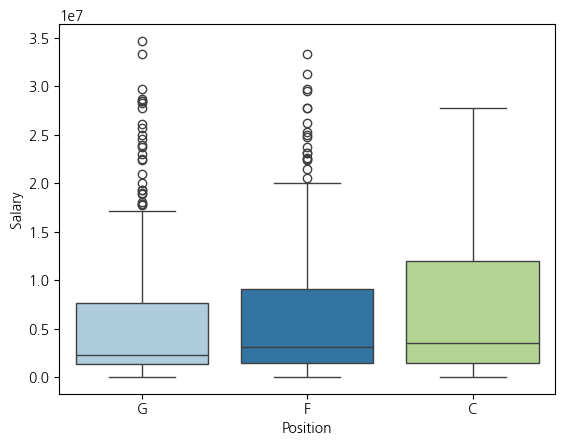

In [145]:
sns.boxplot(x='Position', y='Salary', data=data, hue='Position', palette="Paired")

In [148]:
df3 = pd.read_csv('Seasons_Stats.csv')
df3.rename(columns={'Player':'name'}, inplace=True)
df3 = df3[['Year','name', 'PER']]
df3 = df3[(df3['Year'] >= 2014) & (df3['Year'] <= 2017)]
df3 = df3[['name', 'PER']]
df3 = df3.groupby('name').mean()
df3.head()

,PER
name,
A.J. Hammons,8.400000
A.J. Price,8.980000
Aaron Brooks,12.166667
Aaron Gordon,14.266667
Aaron Gray,7.133333


In [151]:
df1 = df1[['name', 'Salary']]
df1 = df1.groupby('name').sum()
df1.head()

,Salary
name,
A.J. Hammons,1312611.0
Aaron Brooks,2116955.0
Aaron Gordon,5504420.0
Aaron Gray,452059.0
Abdel Nader,1167333.0


In [153]:
data = pd.merge(df1, df3, on='name', how='inner')
data.head()

,Salary,PER
name,,
A.J. Hammons,1312611.0,8.400000
Aaron Brooks,2116955.0,12.166667
Aaron Gordon,5504420.0,14.266667
Aaron Gray,452059.0,7.133333
Al Horford,27734405.0,20.125000


<Axes: xlabel='PER', ylabel='Salary'>

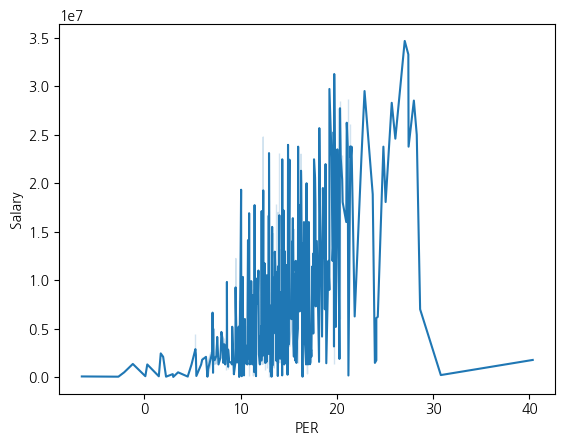

In [155]:
sns.lineplot(data=data, x='PER', y='Salary')